# Libraries and Data Load

## Load Libraries

In [1]:
######################################################Initial Packages########################################################
#Basic Operating System Stuff
import os
import gc #garbage collector
import random #random seed generator
import pandas_profiling # requires import and prior install 

#Timer
from timeit import default_timer as timer #import a timer

#Basic dataframe, array, and math stuff
import pandas as pd #data frame
from pandas_profiling import ProfileReport
import math #math functions
import numpy as np    #numerical package
from patsy import dmatrix, demo_data, ContrastMatrix, Poly

#Scikit learn
from math import sqrt
import sklearn as sk  #scikit learn
import sklearn.linear_model 
from sklearn.linear_model import LogisticRegression as LR
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils import resample #sampling
from sklearn.model_selection import train_test_split as tts, KFold #train test split
from sklearn.decomposition import PCA #principal components
from imblearn.over_sampling import SMOTE #synthetic minority oversampling technique
from sklearn.metrics import classification_report as CR,confusion_matrix, roc_curve, plot_confusion_matrix, precision_recall_curve, plot_precision_recall_curve, average_precision_score #for 2-class model
from sklearn.preprocessing import MinMaxScaler as Scaler, StandardScaler as Scaler2, PolynomialFeatures as poly # used for variable scaling data
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.ensemble import RandomForestClassifier as RFC, ExtraTreesClassifier as ETC, GradientBoostingClassifier as GBC,AdaBoostClassifier as ABC  # Random Forest package
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier as SGD
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.pipeline import make_pipeline


from scipy import misc, stats as st #Lots of stuff here
import itertools

import statsmodels.api as sm
import pyreadstat

#Graphing
import seaborn as sns
import pydot  #For model plotting
import graphviz #python-graphviz package
from IPython.display import SVG #Same here
import matplotlib.pyplot as plt #plotting
import matplotlib #image save
from matplotlib.pyplot import imshow #Show images
from PIL import Image #Another image utility
import cv2 #more image utilities

%matplotlib inline

os.chdir('D:\Bankrupt')
##############################################################################################################################

## Load Data

In [2]:
##############################################################################################################################
mydata=pd.read_csv('bankrupt.csv')
mydata.shape
##############################################################################################################################

(3222, 34)

# Data Preparation

## Handle Missing

### Columns

In [3]:
a=mydata.isnull().sum() #count the nulls by column
print(a.sort_values(ascending=False).head(10))

Hospital_Compare             354
HCAHPS_Star_Rating           349
Facility_Age                 322
Debt_Equty_Ratio             308
Medicaid_Days                251
Market_Concentration         235
HCAHPS_Recommend             194
Serious_Complication_Rate    156
Days_Cash_on_Hand             82
Cash_on_Hand                  82
dtype: int64


In [4]:
mydata=mydata.drop(columns=['Hospital_Compare','HCAHPS_Star_Rating', 'Quick_Ratio', 
                            'Total_Liabilities', 'Affiliated_Physicians', 'Labor_Compensation_Ratio',
                            'Other_Pay_Days','Cash_on_Hand'])

### Rows


In [5]:
pd.set_option('display.max_rows', 500)
b=mydata.isnull().sum(axis=1) #count the nulls by column
b=b.sort_values(ascending=False)
#print(b.head(101))

In [6]:
todrop=b.head(101).index
todrop

Int64Index([1903,  181, 3196, 3004, 1721, 3081, 3033, 1739, 1738, 1737,
            ...
             727,  728, 3218,  738, 3194, 3186, 3187, 3188, 3198, 3197],
           dtype='int64', length=101)

## Drop the Rows and Plot Missing

<AxesSubplot:>

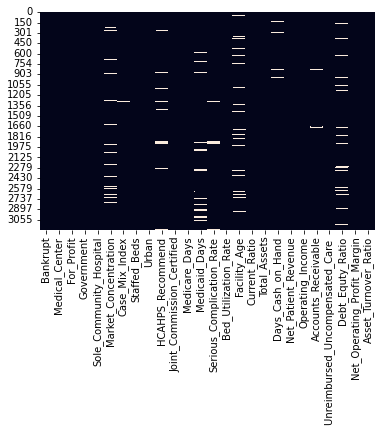

In [7]:
mydata = mydata.drop(todrop)                    
sns.heatmap(mydata.isnull(), cbar=False)

## Impute Median
Given the small number of missing values remaining, impute median.

missing: 0.015441303329800607
(3121, 26)


<AxesSubplot:>

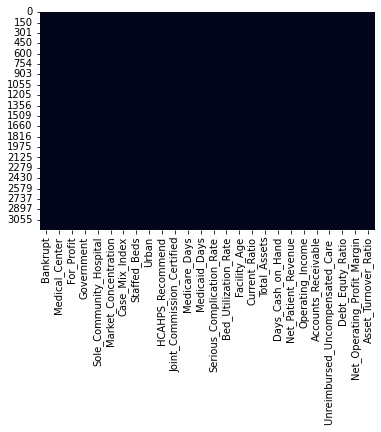

In [8]:
num=mydata.isna().sum().sum()
den=mydata.shape[0]*mydata.shape[1]
print('missing:', num/den)
mydata=mydata.fillna(mydata.median())
print(mydata.shape)
sns.heatmap(mydata.isnull(), cbar=False)

# Describe

In [9]:
mydata.describe()

,Bankrupt,Medical_Center,For_Profit,Government,Sole_Community_Hospital,Market_Concentration,Case_Mix_Index,Staffed_Beds,Urban,HCAHPS_Recommend,...,Current_Ratio,Total_Assets,Days_Cash_on_Hand,Net_Patient_Revenue,Operating_Income,Accounts_Receivable,Unreimbursed_Uncompensated_Care,Debt_Equty_Ratio,Net_Operating_Profit_Margin,Asset_Turnover_Ratio
count,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,...,3121.000000,3.121000e+03,3121.000000,3.121000e+03,3.121000e+03,3.121000e+03,3.121000e+03,3121.000000,3121.000000,3.121000e+03
mean,0.008651,0.057674,0.246395,0.138097,0.150913,0.337243,1.634098,192.681192,0.316565,0.706056,...,6.280070,4.184078e+08,46.915059,2.992452e+08,-1.295130e+06,1.053718e+08,2.026268e+07,1.126248,-0.024745,4.257931e+03
std,0.092623,0.233163,0.430981,0.345057,0.358022,0.313943,0.369350,185.757588,0.465211,0.094531,...,121.428156,1.173077e+09,141.718432,4.365669e+08,9.132477e+07,1.987007e+08,3.839969e+07,21.448284,0.381998,2.377892e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.710000,1.000000,0.000000,0.270000,...,-177.400000,-4.229379e+08,-690.800000,-6.128715e+07,-1.191563e+09,-8.254052e+07,-2.191300e+04,-179.250000,-8.350000,-6.943627e+01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,1.410000,61.000000,0.000000,0.650000,...,1.100000,5.480866e+07,0.100000,7.143678e+07,-9.448072e+06,1.859229e+07,4.237778e+06,0.010000,-0.090000,7.208499e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.235000,1.590000,135.000000,0.000000,0.710000,...,1.900000,1.460698e+08,9.700000,1.616667e+08,3.104700e+04,4.554276e+07,1.009541e+07,0.200000,0.000000,1.087515e+00
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.510000,1.800000,261.000000,1.000000,0.770000,...,3.100000,3.848464e+08,44.300000,3.505475e+08,1.534910e+07,1.120814e+08,2.235255e+07,0.640000,0.080000,1.634588e+00
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.260000,2247.000000,1.000000,1.000000,...,5102.400000,1.893337e+10,2318.000000,5.951047e+09,1.218900e+09,3.711121e+09,6.791545e+08,741.950000,13.030000,1.328431e+07


# Build Training and Test Set, Oversample, Scale

In [10]:
##############################################################################################################################
# Seed value for random number generators to obtain reproducible results
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
temp=mydata
temp=temp.values
tempy=temp[:,0].astype('int')
tempx=temp[:,1:len(temp)]

train, test=tts(temp,test_size=.5, random_state=31)
temp=pd.DataFrame(train)
temp=temp[temp.iloc[:,0]==1]
train=pd.DataFrame(train)

z=0
for i in np.arange(120):
    tmp=temp.sample(frac=1, replace=True, random_state=z)
    z=z+1
    train=pd.concat([train,tmp])
    
print(np.mean(pd.DataFrame(train)[0]))
train=pd.DataFrame(train)
test=pd.DataFrame(test)
y_train=train.iloc[:,0]
X_train=train.iloc[:,1:len(train)]
y_test=test.iloc[:,0]
X_test=test.iloc[:,1:len(test)]





##############################################################################################################################

0.5041666666666667


In [11]:
myscaler=Scaler2()
tmp=myscaler.fit(X_train)
X_train=tmp.fit_transform(X_train)
X_test=tmp.fit_transform(X_test)
print(X_train.shape, X_test.shape)
print(np.unique(y_train,return_counts=True), np.unique(y_test, return_counts=True))

(3120, 25) (1561, 25)
(array([0., 1.]), array([1547, 1573], dtype=int64)) (array([0., 1.]), array([1547,   14], dtype=int64))


# Functions for Confusion Matrix and PR Plot

In [12]:
def myf(mod):
    y_hat=mod.predict(X_test).astype(int) #can use either encoded or decoded data..doesn't help
    results=pd.DataFrame(CR(y_test, y_hat, output_dict=True))
    try:  
        plot_confusion_matrix(mod,X_test,y_test)
    except:
        print('No confusion plot.')
    return(results)

def prplot(mod):
    average_precision = average_precision_score(y_test, mod.predict(X_test))
    disp = plot_precision_recall_curve(mod, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# Logistic Regression Models

                   0.0        1.0  accuracy    macro avg  weighted avg
precision     0.997132   0.021359  0.675208     0.509246      0.988381
recall        0.674208   0.785714  0.675208     0.729961      0.675208
f1-score      0.804474   0.041588  0.675208     0.423031      0.797632
support    1547.000000  14.000000  0.675208  1561.000000   1561.000000


,LR_coef,LR_abscoef
Unreimbursed_Uncompensated_Care,-4.821785,4.821785
HCAHPS_Recommend,-3.703997,3.703997
Joint_Commission_Certified,-3.333175,3.333175
Accounts_Receivable,-3.170710,3.170710
Government,-2.579434,2.579434
Current_Ratio,-2.389496,2.389496
Operating_Income,-2.040575,2.040575
Staffed_Beds,-1.985920,1.985920
Bed_Utilization_Rate,-1.835734,1.835734
Medicaid_Days,1.395508,1.395508


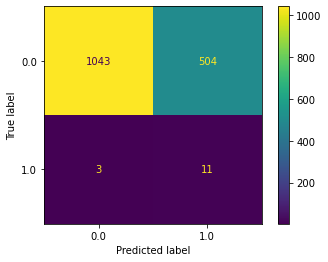

In [13]:
##############################################################################################################################
mylr=LR(fit_intercept = True) #logistic model
mylr.fit(X_train, y_train)  #Fit on training data 
print(myf(mylr)) #predict on test set and plot
feature_names = mydata.columns[1:len(mydata)]
lrdf=pd.DataFrame(np.squeeze(mylr.coef_), columns=['LR_coef'])
lrdf.index=np.squeeze(feature_names)
lrdf['LR_abscoef']=abs(lrdf['LR_coef'])
lrdf.sort_values(by=['LR_abscoef'], ascending=False)

##############################################################################################################################

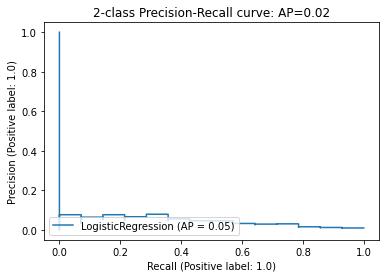

In [14]:
prplot(mylr)

<AxesSubplot:>

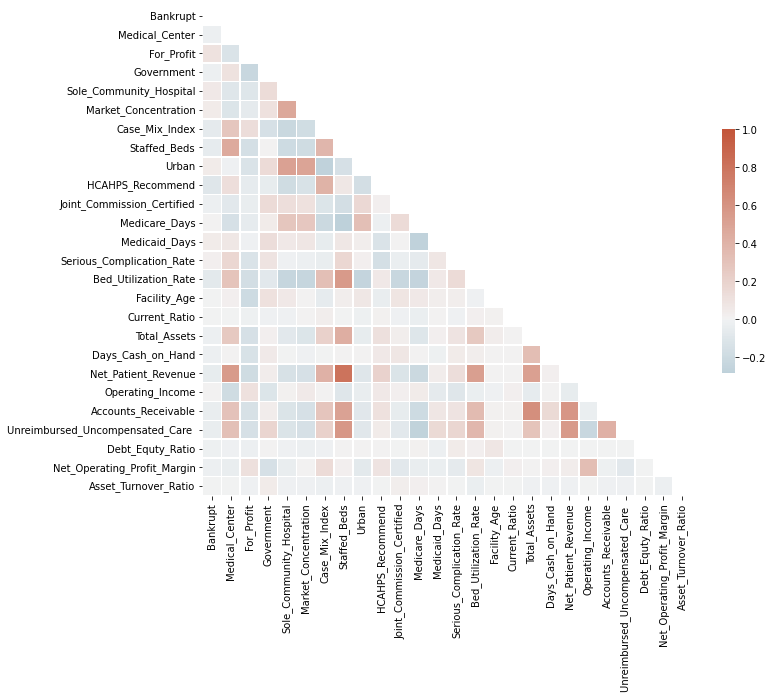

In [15]:
corr = mydata.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## SGD Classifier

                   0.0        1.0  accuracy    macro avg  weighted avg
precision     0.997235   0.023109  0.700192     0.510172      0.988498
recall        0.699418   0.785714  0.700192     0.742566      0.700192
f1-score      0.822188   0.044898  0.700192     0.433543      0.815217
support    1547.000000  14.000000  0.700192  1561.000000   1561.000000


,SGD_coef,SGD_abscoef
Unreimbursed_Uncompensated_Care,-9.141294,9.141294
Joint_Commission_Certified,-6.453722,6.453722
Current_Ratio,-5.819364,5.819364
Accounts_Receivable,-5.790951,5.790951
Government,-5.143397,5.143397
HCAHPS_Recommend,-4.268944,4.268944
Medical_Center,-2.920602,2.920602
Operating_Income,-2.662187,2.662187
Bed_Utilization_Rate,-2.166811,2.166811
Staffed_Beds,-1.887079,1.887079


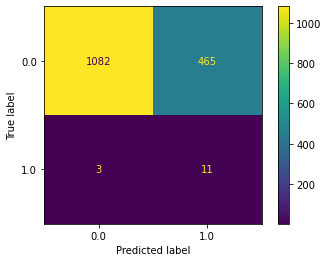

In [16]:
mysgd=SGD(loss='hinge', fit_intercept=True, random_state=43)
mysgd.fit(X_train,y_train)
print(myf(mysgd))
sgddf=pd.DataFrame(np.squeeze(mysgd.coef_), columns=['SGD_coef'])
sgddf.index=np.squeeze(feature_names)
sgddf['SGD_abscoef']=abs(sgddf['SGD_coef'])
sgddf.sort_values(by=['SGD_abscoef'], ascending=False)

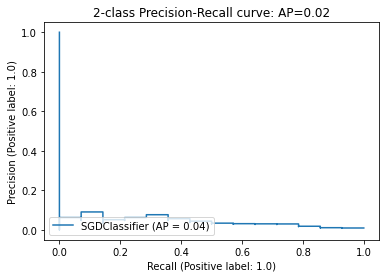

In [17]:
prplot(mysgd)

# Tree Models

## Tree Plots

In [18]:
def mytree(mod):
    imp, std=mod.feature_importances_, np.std([mod.feature_importances_ for tree in mod.estimators_], axis=0)
    importances = pd.Series(imp, index=mydata.columns[1:58]).sort_values(ascending=False)[0:20]
    fig, ax = plt.subplots()
    importances.plot.bar(yerr=std[0:20], ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()

## Random Forest Classifier

                   0.0        1.0  accuracy    macro avg  weighted avg
precision     0.997227   0.022965   0.69827     0.510096      0.988490
recall        0.697479   0.785714   0.69827     0.741597      0.698270
f1-score      0.820844   0.044625   0.69827     0.432735      0.813883
support    1547.000000  14.000000   0.69827  1561.000000   1561.000000


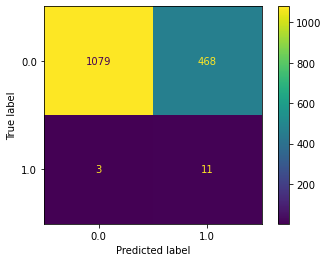

In [19]:
##############################################################################################################################
myrf=RFC(n_estimators = 1000,max_depth=2,min_samples_split=2, criterion='entropy',bootstrap=True,                   
                            n_jobs = -1, random_state = 64) #RF Model
myrf.fit(X_train, y_train)  # Fit on the training set 
print(myf(myrf))
##############################################################################################################################

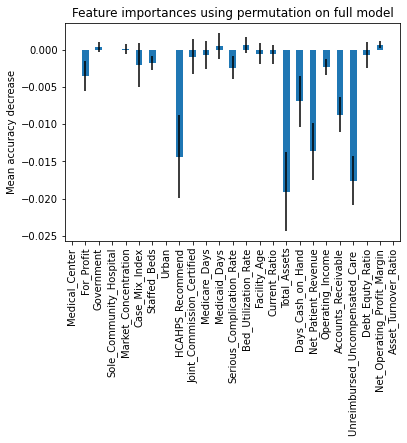

In [20]:
from sklearn.inspection import permutation_importance
result = permutation_importance(myrf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
#fig.tight_layout()
plt.show()

In [21]:
rfdf=pd.DataFrame(result.importances_mean, columns=['RF_coef'])
rfdf.index=feature_names
rfdf['RF_abscoef']=abs(rfdf['RF_coef'])
rfdf.sort_values(by=['RF_abscoef'], ascending=False)

,RF_coef,RF_abscoef
Total_Assets,-0.019026,0.019026
Unreimbursed_Uncompensated_Care,-0.017553,0.017553
HCAHPS_Recommend,-0.014350,0.014350
Net_Patient_Revenue,-0.013645,0.013645
Accounts_Receivable,-0.008712,0.008712
Days_Cash_on_Hand,-0.006919,0.006919
For_Profit,-0.003523,0.003523
Serious_Complication_Rate,-0.002434,0.002434
Operating_Income,-0.002306,0.002306
Case_Mix_Index,-0.002114,0.002114


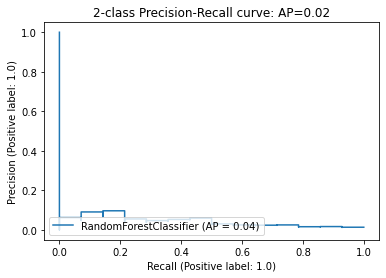

In [22]:
prplot(myrf)

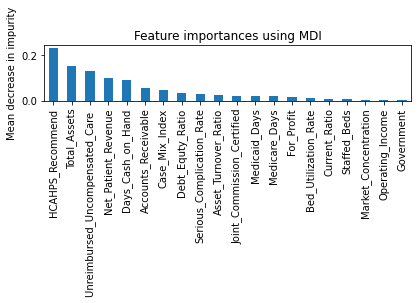

In [23]:
mytree(myrf)

##  Extreme Gradient Boosting

[09:28:11] WARNING: ..\src\learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:28:11] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.997932,0.020202,0.625881,0.509067,0.989163
recall,0.623788,0.857143,0.625881,0.740465,0.625881
f1-score,0.767701,0.039474,0.625881,0.403587,0.761170
support,1547.000000,14.000000,0.625881,1561.000000,1561.000000


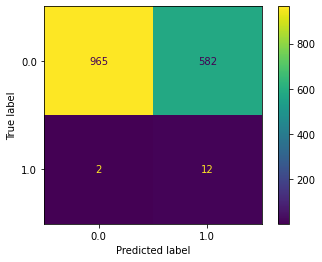

In [24]:
##############################################################################################################################
import xgboost
myGBC = xgboost.XGBClassifier(random_state=7,use_label_encoder=False, max_depth=3, booster='gblinear')
myGBC.fit(X_train, y_train)  #Fit on training set
myf(myGBC)
##############################################################################################################################

In [25]:
xgbdf=pd.DataFrame(myGBC.coef_, columns=['XGB_coef'])
xgbdf.index=feature_names
xgbdf['XGB_abscoef']=abs(xgbdf['XGB_coef'])
xgbdf.sort_values(by=['XGB_abscoef'], ascending=False)


,XGB_coef,XGB_abscoef
Current_Ratio,-24.439300,24.439300
Unreimbursed_Uncompensated_Care,-9.441990,9.441990
HCAHPS_Recommend,-4.598600,4.598600
Accounts_Receivable,-4.045670,4.045670
Joint_Commission_Certified,-3.763510,3.763510
Government,-3.178610,3.178610
Operating_Income,-3.129250,3.129250
Bed_Utilization_Rate,-2.007560,2.007560
Staffed_Beds,-1.746570,1.746570
Medical_Center,-1.647940,1.647940


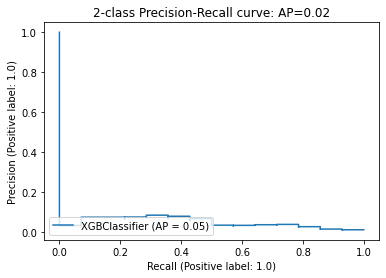

In [26]:
prplot(myGBC)

# Neural Network

                   0.0        1.0  accuracy    macro avg  weighted avg
precision     0.997345   0.025522   0.72902     0.511434      0.988629
recall        0.728507   0.785714   0.72902     0.757111      0.729020
f1-score      0.841987   0.049438   0.72902     0.445713      0.834879
support    1547.000000  14.000000   0.72902  1561.000000   1561.000000


,NN_coef,NN_abscoef
Unreimbursed_Uncompensated_Care,-36.366563,36.366563
Joint_Commission_Certified,-25.832792,25.832792
Accounts_Receivable,-25.695163,25.695163
Government,-21.792313,21.792313
HCAHPS_Recommend,-21.236925,21.236925
Current_Ratio,-17.740231,17.740231
Staffed_Beds,-11.346138,11.346138
Asset_Turnover_Ratio,-10.180958,10.180958
Debt_Equty_Ratio,-9.948229,9.948229
Bed_Utilization_Rate,-9.764423,9.764423


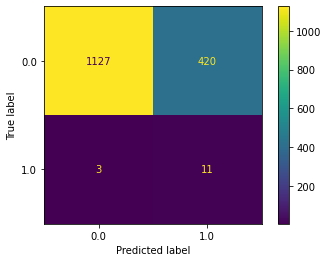

In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
#nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1,3,6), random_state=1)
nn=Perceptron(random_state=1)
nn.fit(X_train, y_train)
print(myf(nn))
nndf=pd.DataFrame(np.squeeze(nn.coef_), columns=['NN_coef'])
nndf.index=np.squeeze(feature_names)
nndf['NN_abscoef']=abs(nndf['NN_coef'])
nndf.sort_values(by=['NN_abscoef'], ascending=False)

In [30]:
total=pd.concat([lrdf, sgddf,nndf,rfdf,xgbdf], axis=1)
total=total.drop(columns=['LR_abscoef','SGD_abscoef', 'RF_abscoef','XGB_abscoef', 'NN_abscoef'])
total

,LR_coef,SGD_coef,NN_coef,RF_coef,XGB_coef
Medical_Center,-1.269790,-2.920602,-2.703756,0.000000,-1.647940
For_Profit,-0.096141,-0.634560,-1.593449,-0.003523,-0.270393
Government,-2.579434,-5.143397,-21.792313,0.000320,-3.178610
Sole_Community_Hospital,0.425320,0.615167,-0.043174,0.000000,0.403709
Market_Concentration,-0.409037,-0.569320,-2.261354,0.000064,-0.111333
Case_Mix_Index,-0.041588,0.154331,0.857305,-0.002114,0.100017
Staffed_Beds,-1.985920,-1.887079,-11.346138,-0.001794,-1.746570
Urban,-0.281855,-0.074865,-1.089488,0.000000,-0.733055
HCAHPS_Recommend,-3.703997,-4.268944,-21.236925,-0.014350,-4.598600
Joint_Commission_Certified,-3.333175,-6.453722,-25.832792,-0.000961,-3.763510
